In [ ]:
from keras.applications.resnet50 import ResNet50, preprocess_input

HEIGHT = 300
WIDTH = 300

base_model = ResNet50(weights='imagenet', 
                      include_top=False, 
                      input_shape=(HEIGHT, WIDTH, 3))

Using TensorFlow backend.


/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 9s 0us/step


In [ ]:
!wget https://b2share.eudat.eu/api/files/3d88cc68-2a1f-4df9-bc2e-27a8086d47aa/Biological.tar
!wget https://b2share.eudat.eu/api/files/3d88cc68-2a1f-4df9-bc2e-27a8086d47aa/Fibres.tar
!wget https://b2share.eudat.eu/api/files/3d88cc68-2a1f-4df9-bc2e-27a8086d47aa/Films_Coated_Surface.tar
!wget https://b2share.eudat.eu/api/files/3d88cc68-2a1f-4df9-bc2e-27a8086d47aa/Nanowires.tar
!wget https://b2share.eudat.eu/api/files/3d88cc68-2a1f-4df9-bc2e-27a8086d47aa/Particles.tar
!wget https://b2share.eudat.eu/api/files/3d88cc68-2a1f-4df9-bc2e-27a8086d47aa/Patterned_surface.tar
!wget https://b2share.eudat.eu/api/files/3d88cc68-2a1f-4df9-bc2e-27a8086d47aa/Porous_Sponge.tar
!wget https://b2share.eudat.eu/api/files/3d88cc68-2a1f-4df9-bc2e-27a8086d47aa/Powder.tar
!wget https://b2share.eudat.eu/api/files/3d88cc68-2a1f-4df9-bc2e-27a8086d47aa/Tips.tar


--2020-02-05 16:45:35--  https://b2share.eudat.eu/api/files/3d88cc68-2a1f-4df9-bc2e-27a8086d47aa/Biological.tar
Resolving b2share.eudat.eu (b2share.eudat.eu)... 86.50.166.74
Connecting to b2share.eudat.eu (b2share.eudat.eu)|86.50.166.74|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36436992 (35M) [application/octet-stream]
Saving to: ‘Biological.tar’

Biological.tar      100%[===================>]  34.75M  6.64MB/s    in 5.2s    

2020-02-05 16:45:43 (6.64 MB/s) - ‘Biological.tar’ saved [36436992/36436992]

--2020-02-05 16:45:44--  https://b2share.eudat.eu/api/files/3d88cc68-2a1f-4df9-bc2e-27a8086d47aa/Fibres.tar
Resolving b2share.eudat.eu (b2share.eudat.eu)... 86.50.166.74
Connecting to b2share.eudat.eu (b2share.eudat.eu)|86.50.166.74|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21227520 (20M) [application/octet-stream]
Saving to: ‘Fibres.tar’

Fibres.tar          100%[===================>]  20.24M  5.35MB/s    in 3.8s    

2020

In [ ]:
!mkdir images
!tar xvf Biological.tar -C images
!tar xvf Fibres.tar -C images
!tar xvf Films_Coated_Surface.tar -C images
!tar xvf Nanowires.tar -C images
!tar xvf Particles.tar -C images
!tar xvf Patterned_surface.tar -C images
!tar xvf Porous_Sponge.tar -C images
!tar xvf Powder.tar -C images
!tar xvf Tips.tar -C images

Biological/L7_981de89562817fcd1f25d4ee7311d23f.jpg
Biological/L7_fc26c39516325f67a936aa17482e00d1.jpg
Biological/L7_d445e662f42ae2227aa794d3b5e09f73.jpg
Biological/L7_5ccc95fa83fac4db1d68a99f6228760f.jpg
Biological/L7_1b4050e20a6c59b054d3fc61db83c0ea.jpg
Biological/L7_380e971564f4e965826501a96a21b362.jpg
Biological/L7_10a6e0f923bf90c573bba95511f14dfc.jpg
Biological/
Biological/L7_b93c5f734a479a3915fa4cad16f7f791.jpg
Biological/L7_f662da3e0404829c533283fa1b952725.jpg
Biological/L7_6c8786404b53cc1acc7d9f76a7c92888.jpg
Biological/L7_dbb77b038488949ac25f1b7bcd11f794.jpg
Biological/L7_6dc797b4c4b93374bdce2fc95fa05934.jpg
Biological/L7_a98abc2b1830ffbcb3359816ece954ba.jpg
Biological/L7_64f7e0f47c17a455e25d18cf223d3529.jpg
Biological/L7_6c52ef2f20f6de7d8e8bf9939e070c9d.jpg
Biological/L7_062eb90b8621244996f0f9406b15267b.jpg
Biological/L7_3fe0dfbd75cb844bcb54a9b8d3d3573f.jpg
Biological/L7_00818fa32c83d25ad3b8133f468c2637.jpg
Biological/L7_fb1f95dee7bac8355833044e5045c679.jpg
Biological/L7_80336

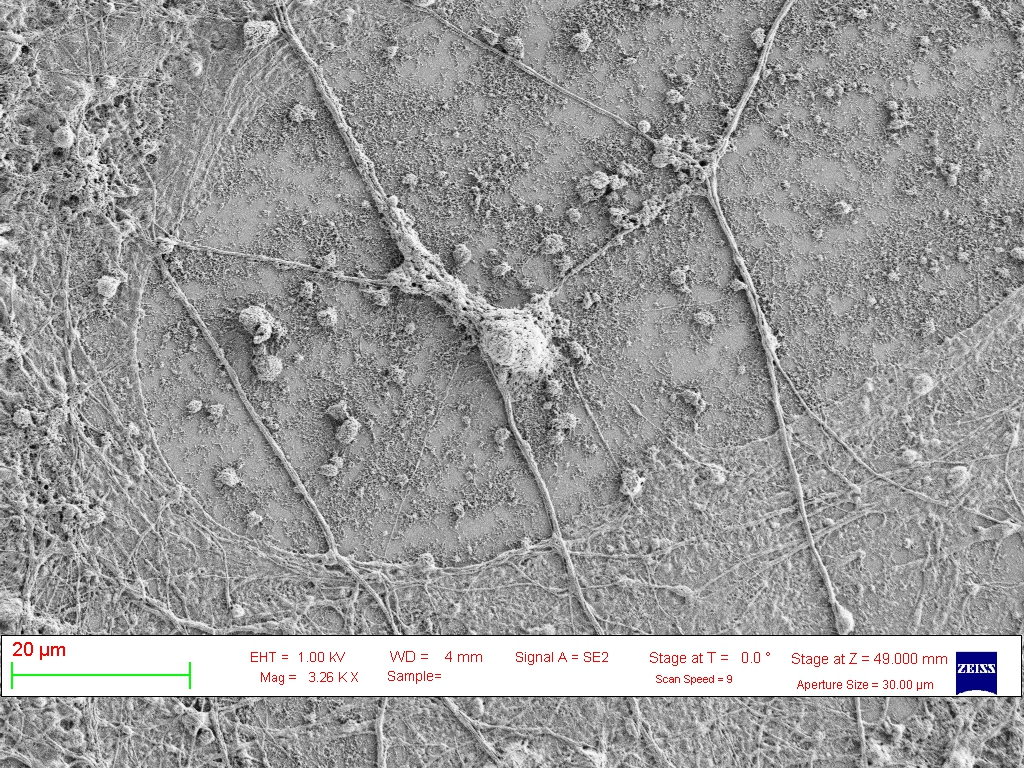

In [ ]:
import cv2 
from google.colab.patches import cv2_imshow
# Save image in set directory 
# Read RGB image 
img = cv2.imread('images/Biological/L7_6ba8ecec045e73b9235743fc7660ff52.jpg')  

# Output img with window name as 'image' 
cv2_imshow(img)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
TRAIN_DIR = "images"
HEIGHT = 300
WIDTH = 300
BATCH_SIZE = 32

train_datagen =  ImageDataGenerator(
      preprocessing_function=preprocess_input,
      rotation_range=90,
      horizontal_flip=True,
      vertical_flip=True,validation_split = 0.3
    )

train_generator = train_datagen.flow_from_directory(TRAIN_DIR, 
                                                    target_size=(HEIGHT, WIDTH), 
                                                    batch_size=BATCH_SIZE,subset='training')
validate_generator = train_datagen.flow_from_directory(TRAIN_DIR, 
                                                    target_size=(HEIGHT, WIDTH), 
                                                    batch_size=BATCH_SIZE,subset='validation')


Found 662 images belonging to 9 classes.
Found 280 images belonging to 9 classes.


In [ ]:
from keras.layers import Dense, Activation, Flatten, Dropout
from keras.models import Sequential, Model

def build_finetune_model(base_model, dropout, fc_layers, num_classes):
    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output
    x = Flatten()(x)
    for i in range(len(fc_layers)):
        # New FC layer, random init
        x = Dense(fc_layers[i], activation='relu')(x) 
        x = Dropout(dropout)(x)

    # New softmax layer
    predictions = Dense(num_classes, activation='softmax')(x) 
    
    finetune_model = Model(inputs=base_model.input, outputs=predictions)

    return finetune_model


FC_LAYERS = [1024, 1024]
dropout = 0.5

finetune_model = build_finetune_model(base_model, 
                                      dropout=dropout, 
                                      fc_layers=FC_LAYERS, 
                                      num_classes=9)


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [ ]:
from keras.optimizers import SGD, Adam


NUM_EPOCHS = 10
BATCH_SIZE = 32
num_train_images = 662

adam = Adam(lr=0.00001)
finetune_model.compile(adam, loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
history = finetune_model.fit(train_generator, epochs=NUM_EPOCHS, workers=8, 
                                       steps_per_epoch=num_train_images // BATCH_SIZE, validation_data = validate_generator, 
                                       shuffle=True)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/10
16/20 [=======================>......] - ETA: 1:26 - loss: 3.5440 - acc: 0.2164